# Generate Test Signals

In [1]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt

np.random.seed(10)

### Sine, Sawtooth and Random

In [2]:
samples = np.linspace(0, 200, 1000)

sig_sine = np.sin(samples * 1)
sig_saw = sig.sawtooth(samples * 1.9)
sig_rand = np.random.random(len(samples)) / 5

max_amp_sine = max(sig_sine)
max_amp_saw = max(sig_saw)
max_amp_rand = max(sig_rand)

# Mix Test Signals

In [3]:
test_mix = sig_sine + sig_saw + sig_rand

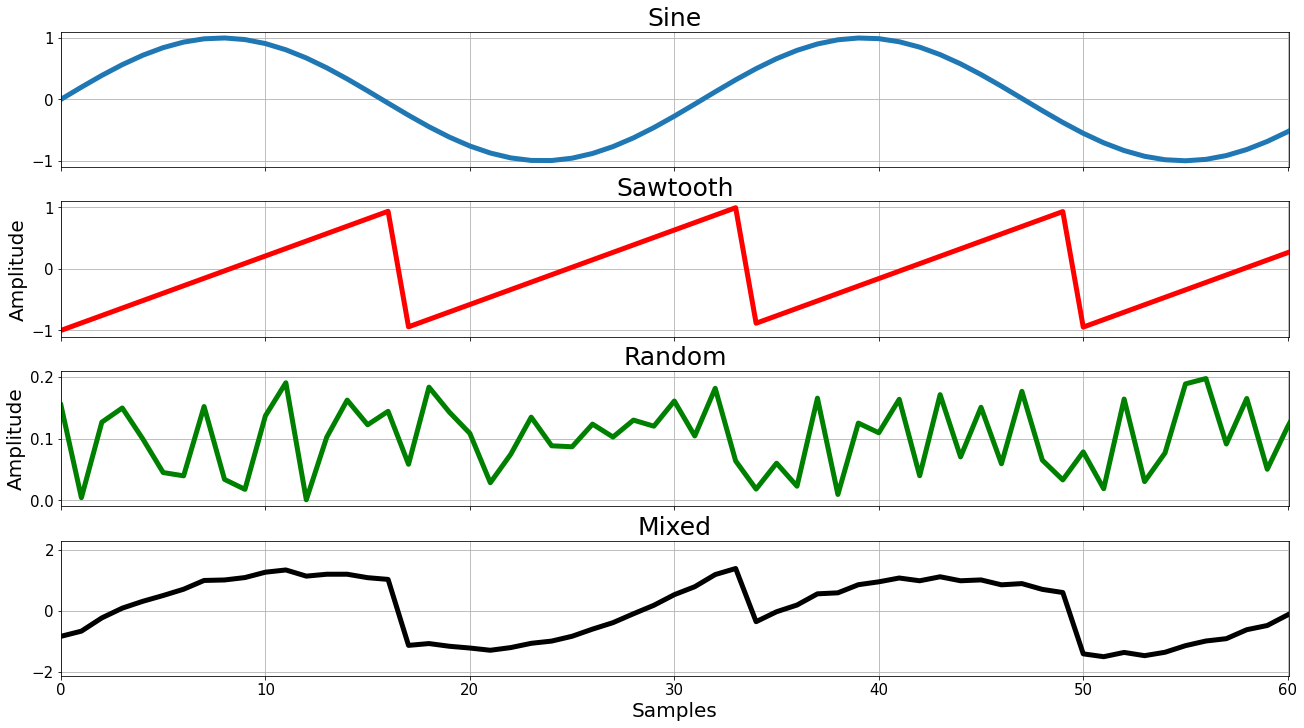

In [4]:
fig, axs = plt.subplots(4, 1, figsize=[18, 10], sharex=True, constrained_layout = True)

axs[0].plot(sig_sine, lw=5)
axs[0].set_title('Sine', fontsize=25)

axs[1].plot(sig_saw, lw=5, color='red')
axs[1].set_title('Sawtooth', fontsize=25)
axs[1].set_ylabel('Amplitude', fontsize=20)

axs[2].plot(sig_rand, lw=5, color='green')
axs[2].set_title('Random', fontsize=25)
axs[2].set_ylabel('Amplitude', fontsize=20)

axs[3].plot(test_mix, lw=5, color='black')
axs[3].set_title('Mixed', fontsize=25)
axs[3].set_xlabel('Samples', fontsize=20)

for ax in axs:
    ax.set_xlim(samples[0], samples[300])
    ax.tick_params(labelsize=15)
    ax.grid()

# Remove Signal Components through Inversion 

In [5]:
def remove_with_inversion(signal, noise):
    return signal - noise

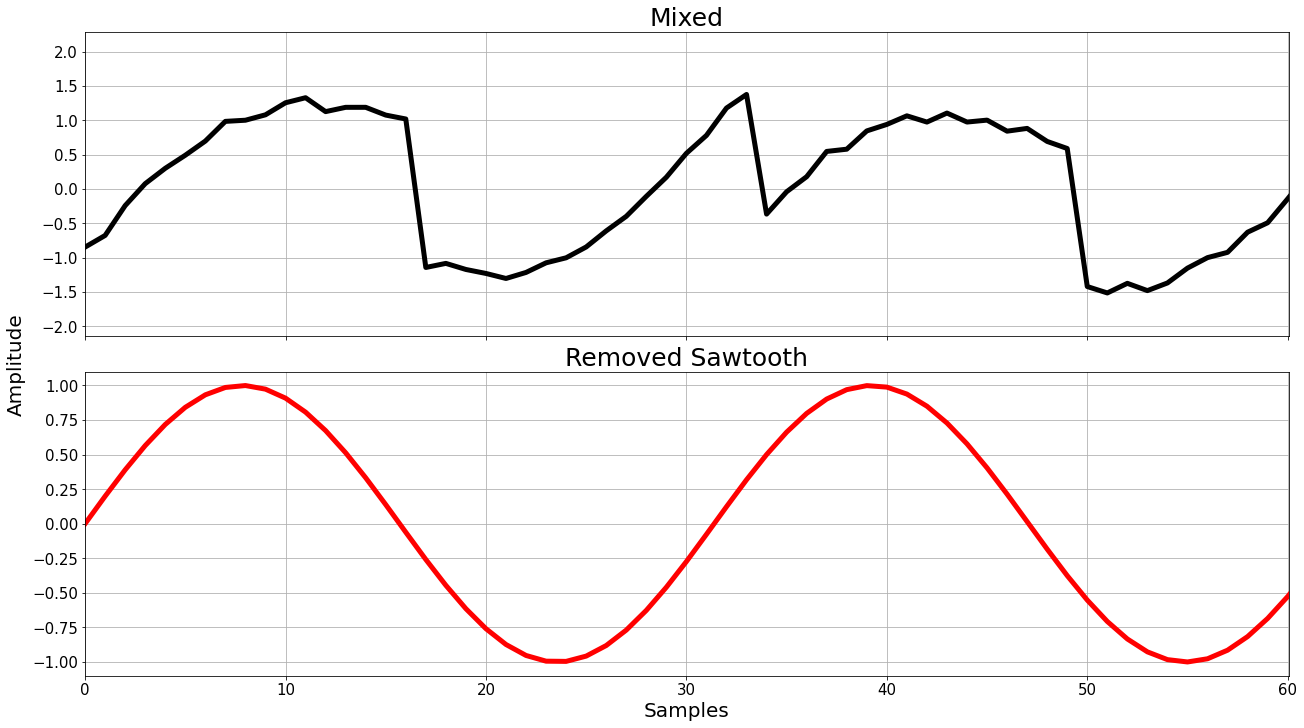

In [6]:
fig, axs = plt.subplots(2, 1, figsize=[18, 10], sharex=True, constrained_layout = True)
fig.supylabel('Amplitude', fontsize=20)

axs[0].plot(test_mix, lw=5, color='black')
axs[0].set_title('Mixed', fontsize=25)

axs[1].plot(remove_with_inversion(test_mix, sig_saw + sig_rand), lw=5, color='red')
axs[1].set_title('Removed Sawtooth', fontsize=25)
axs[1].set_xlabel('Samples', fontsize=20)

for ax in axs:
    ax.set_xlim(samples[0], samples[300])
    ax.tick_params(labelsize=15)
    ax.grid()

# ICA

In [7]:
from sklearn.decomposition import FastICA


### Combine Test Signals

In [8]:
sig_1 = sig_sine + 0.3 * sig_saw + 0.2 * sig_rand 
sig_2 = 0.3 * sig_sine + sig_saw + 0.2 * sig_rand
sig_3 = 0.2 * sig_sine + 0.2 * sig_saw + sig_rand

Input = np.c_[sig_1, sig_2, sig_3]


### Normalize Data

In [9]:
Input /= Input.std(axis=0)

### Make Observation with Mixing Matrix

In [10]:
Mixing = np.array([[0.5, 1, 0.2],
              [1, 0.5, 0.4],
              [0.5, 0.8, 1]])
Observation = np.dot(Input, Mixing.T) 

### Calculate FastICA

In [11]:
ica = FastICA(n_components=3)
Ica_recovered = ica.fit_transform(Observation) 

In [12]:
max_amp_ica_sine = max(Ica_recovered[:, 0])
max_amp_ica_saw = max(Ica_recovered[:, 1])
max_amp_ica_rand = max(Ica_recovered[:, 2])

amp_factor = [max_amp_sine / max_amp_ica_sine, max_amp_saw / max_amp_ica_saw, max_amp_rand / max_amp_ica_rand]

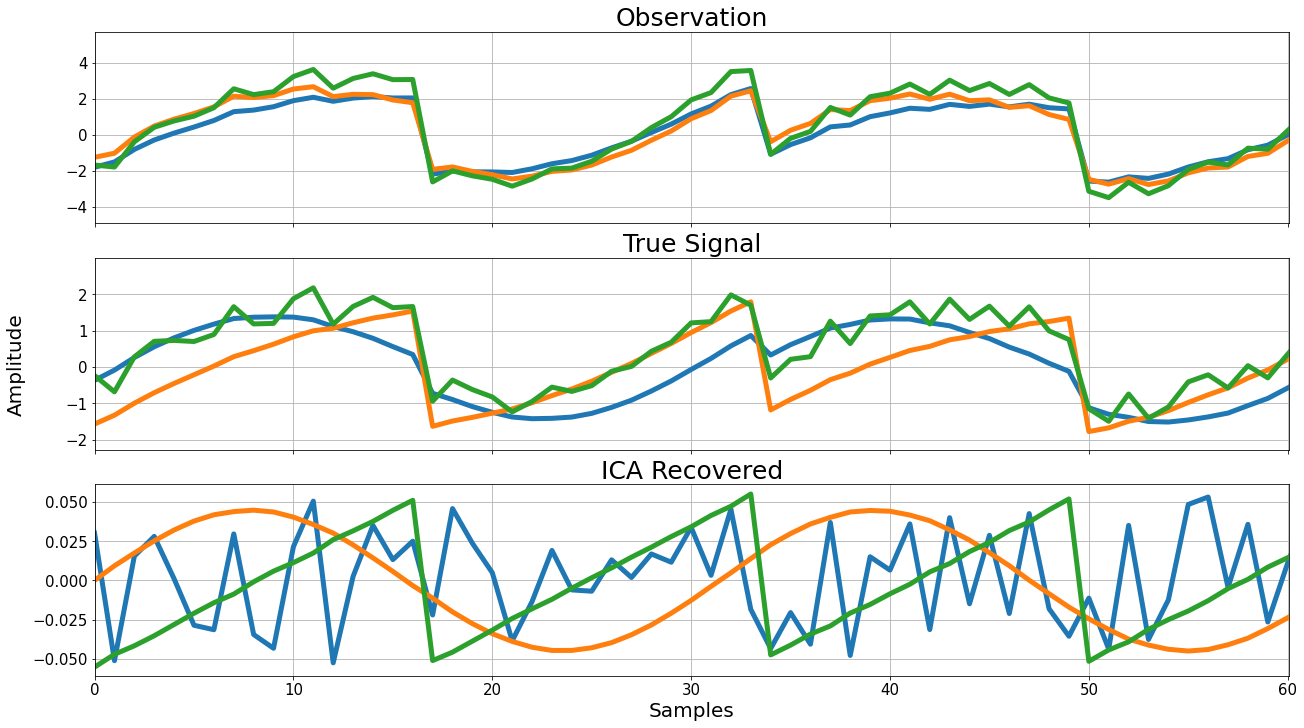

In [13]:
fig, axs = plt.subplots(3, 1, figsize=[18, 10], sharex=True, constrained_layout = True)
fig.supylabel('Amplitude', fontsize=20)

axs[0].plot(Observation, lw=5)
axs[0].set_title('Observation', fontsize=25)

axs[1].plot(Input, lw=5)
axs[1].set_title('True Signal', fontsize=25)

axs[2].plot(Ica_recovered, lw=5)
axs[2].set_title('ICA Recovered', fontsize=25)
axs[2].set_xlabel('Samples', fontsize=20)

for ax in axs:
    ax.set_xlim(samples[0], samples[300])
    ax.tick_params(labelsize=15)
    ax.grid()

# Wavelet Transform

In [14]:
import pywt

In [15]:
# print the wavelet families available
print(pywt.families())
# print a list of available wavelets from one family
print(pywt.wavelist("sym"))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [16]:
sample_rate = 1.0e6
ts = 1.0/sample_rate
t = np.arange(0,1,ts)

# frequency of the signal
freq = 5   
y1 = np.sin(2*np.pi*10e3*t)
y2 = np.sin(2*np.pi*0.4e6*t) / 5

wt_mix = y1 + y2

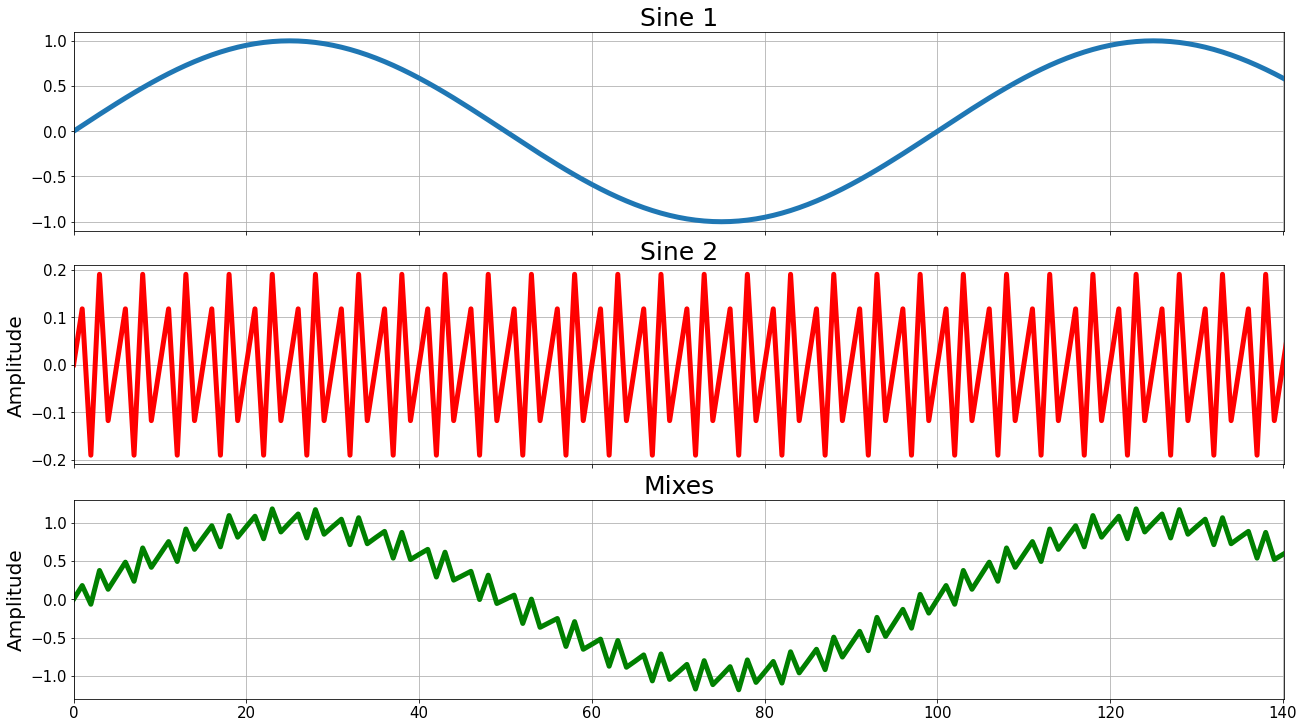

In [17]:
fig, axs = plt.subplots(3, 1, figsize=[18, 10], sharex=True, constrained_layout = True)

axs[0].plot(y1, lw=5)
axs[0].set_title('Sine 1', fontsize=25)

axs[1].plot(y2, lw=5, color='red')
axs[1].set_title('Sine 2', fontsize=25)
axs[1].set_ylabel('Amplitude', fontsize=20)

axs[2].plot(wt_mix, lw=5, color='green')
axs[2].set_title('Mixes', fontsize=25)
axs[2].set_ylabel('Amplitude', fontsize=20)

for ax in axs:
    ax.set_xlim(samples[0], samples[700])
    ax.tick_params(labelsize=15)
    ax.grid()

In [18]:
coeffs = pywt.wavedec(wt_mix, 'sym12', mode='sym')
# cA2, cD2, cD1 = coeffs

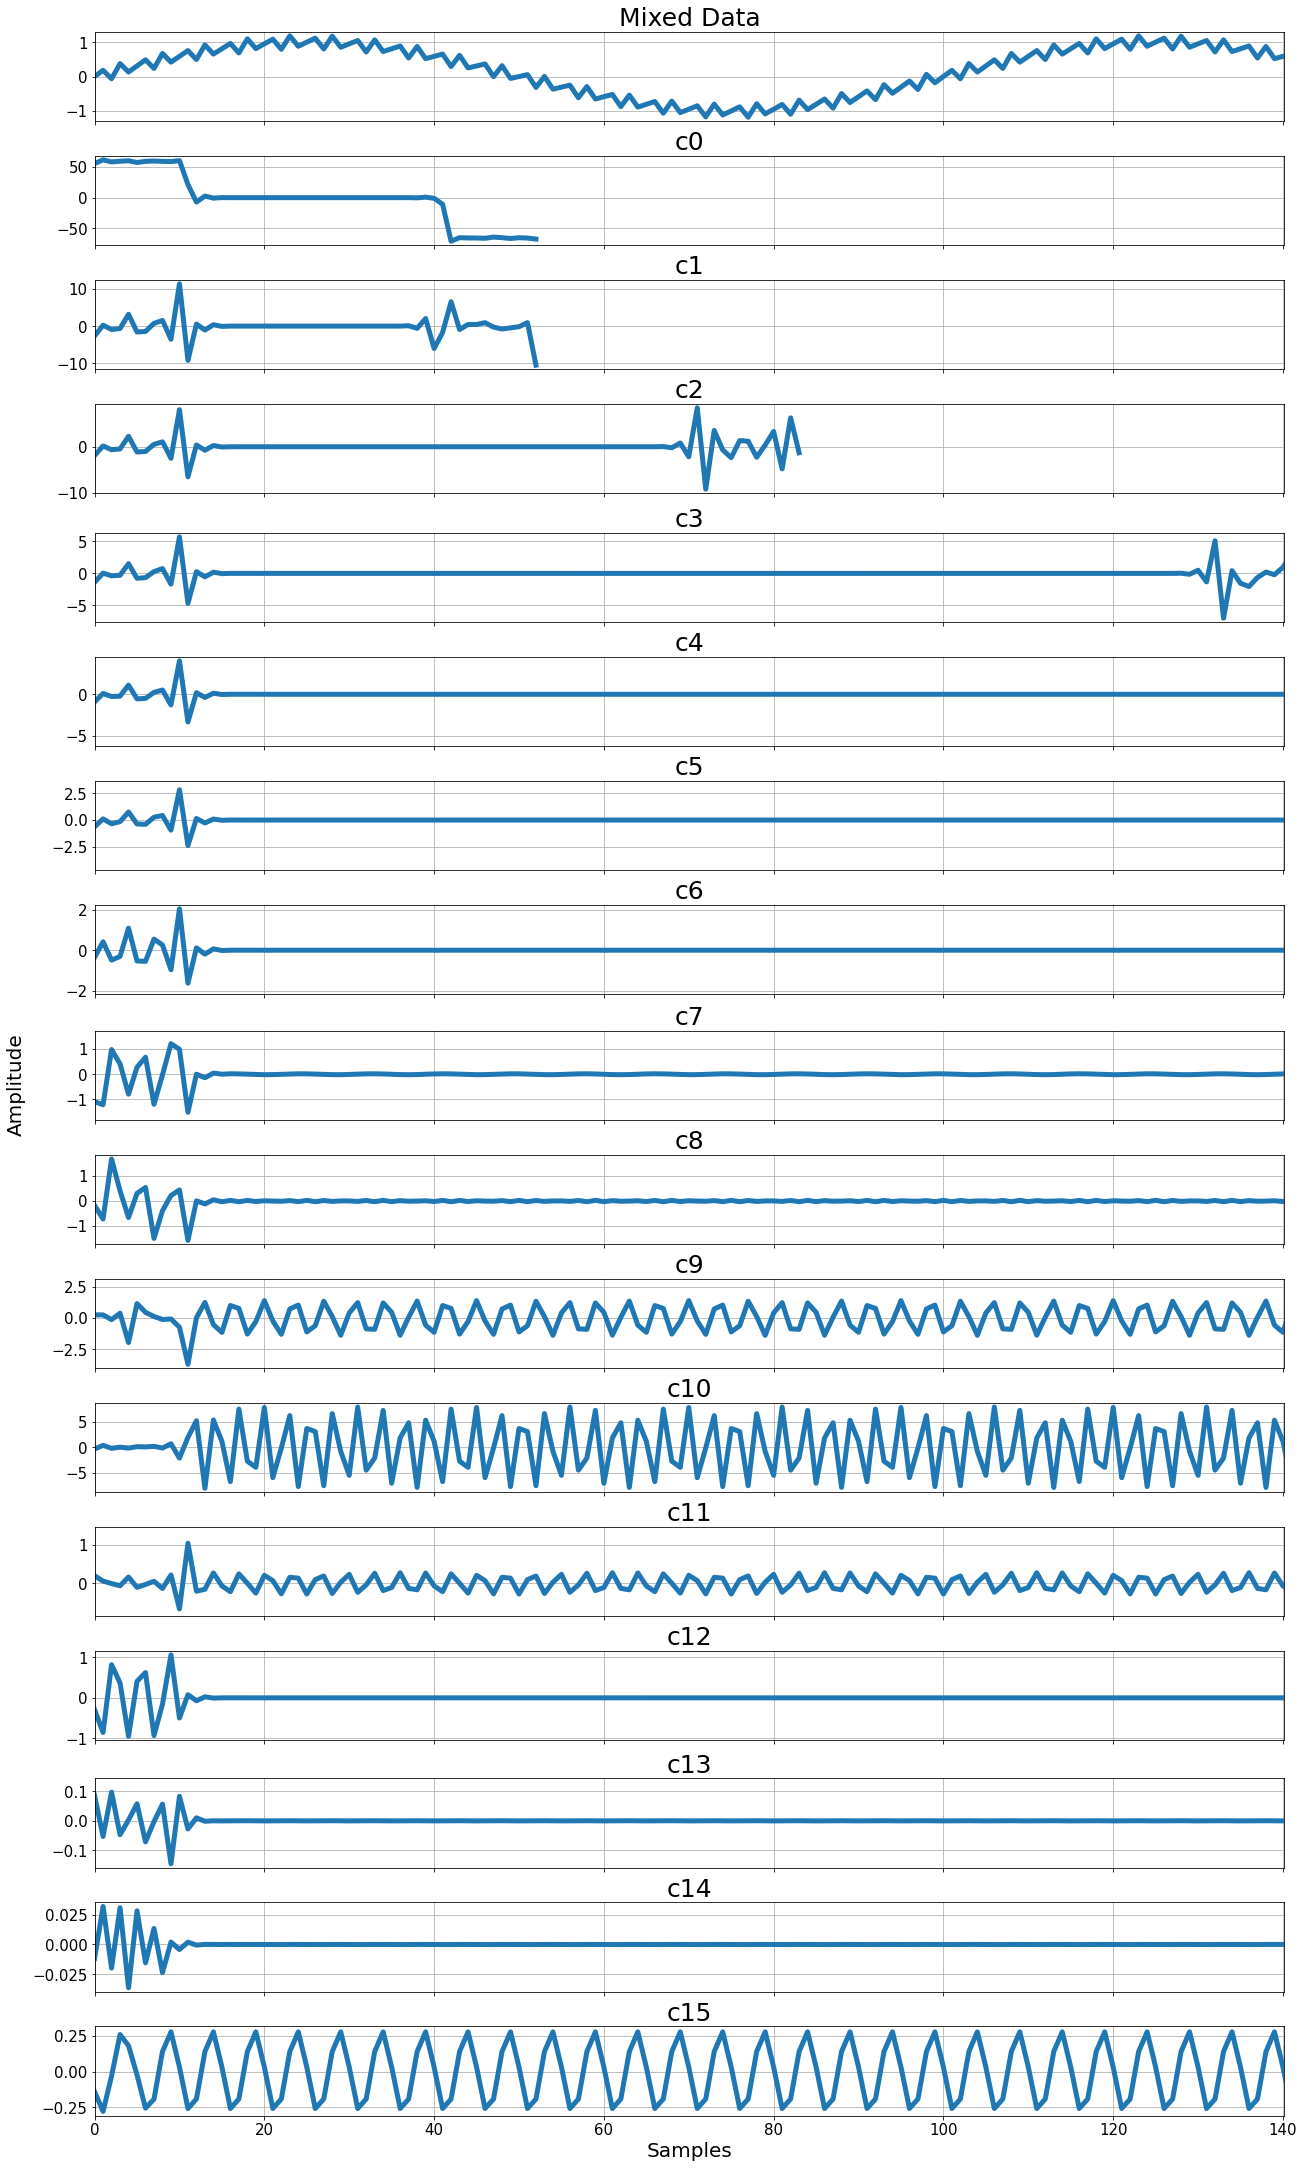

In [19]:
fig, axs = plt.subplots(len(coeffs)+1, 1, figsize=[18, 30], sharex=True, constrained_layout = True)
fig.supylabel('Amplitude', fontsize=20)

axs[0].plot(wt_mix, lw=5)
axs[0].set_title('Mixed Data', fontsize=25)

for ii, coeff in enumerate(coeffs):
    axs[ii+1].plot(coeff, lw=5)
    axs[ii+1].set_title('c'+ str(ii), fontsize=25)

axs[len(coeffs)].set_xlabel('Samples', fontsize=20)

for ax in axs:
    ax.set_xlim(samples[0], samples[700])
    ax.tick_params(labelsize=15)
    ax.grid()

In [20]:
ctn = list(range(0, 2))
for ii in ctn:
    coeffs[-ii] = np.zeros_like(coeffs[-ii])

recov_sig = pywt.waverec(coeffs, 'sym12', mode='sym')
#recov_sig = pywt.waverec((cA2, cD1), 'bior6.8', mode='sym')

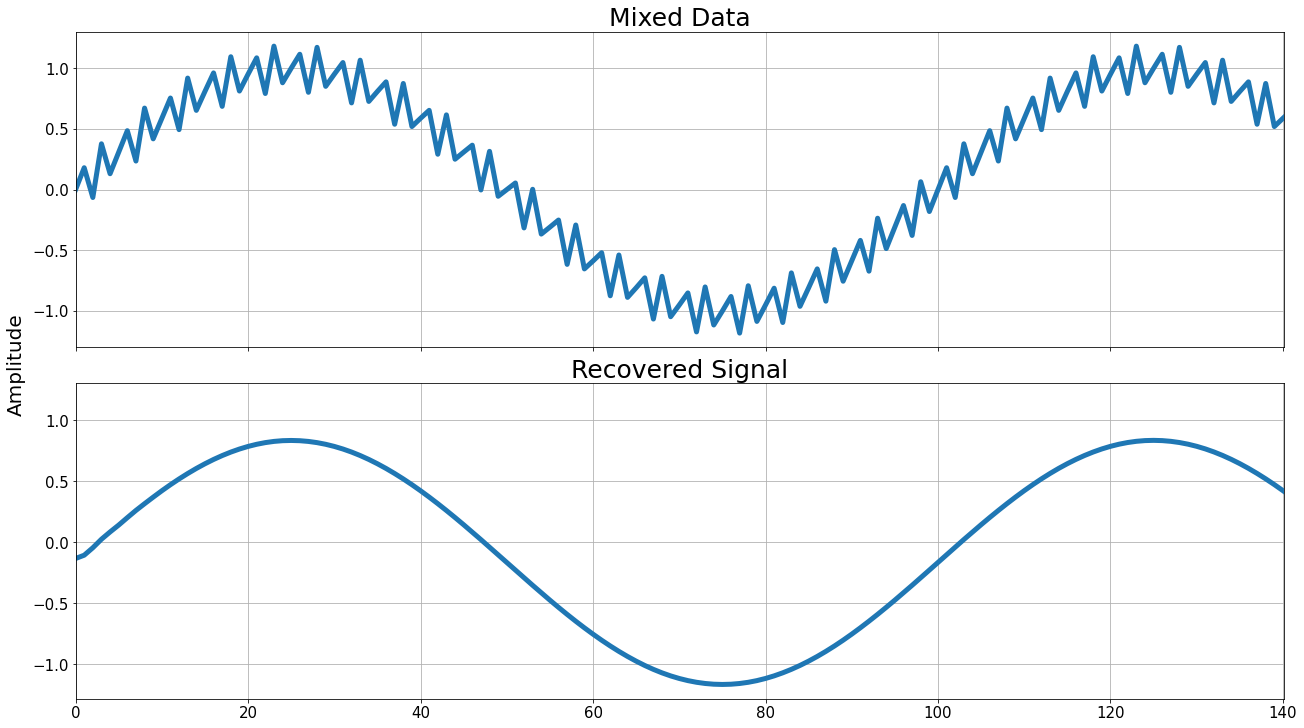

In [21]:
fig, axs = plt.subplots(2, 1, figsize=[18, 10], sharex=True, constrained_layout = True)
fig.supylabel('Amplitude', fontsize=20)

axs[0].plot(wt_mix, lw=5)
axs[0].set_title('Mixed Data', fontsize=25)

axs[1].plot(recov_sig, lw=5)
axs[1].set_title('Recovered Signal', fontsize=25)

for ax in axs:
    ax.set_xlim(samples[0], samples[700])
    ax.tick_params(labelsize=15)
    ax.grid()

# STFT

In [22]:
import scipy.signal as signal

Text(0.5, 0, 'Time [sec]')

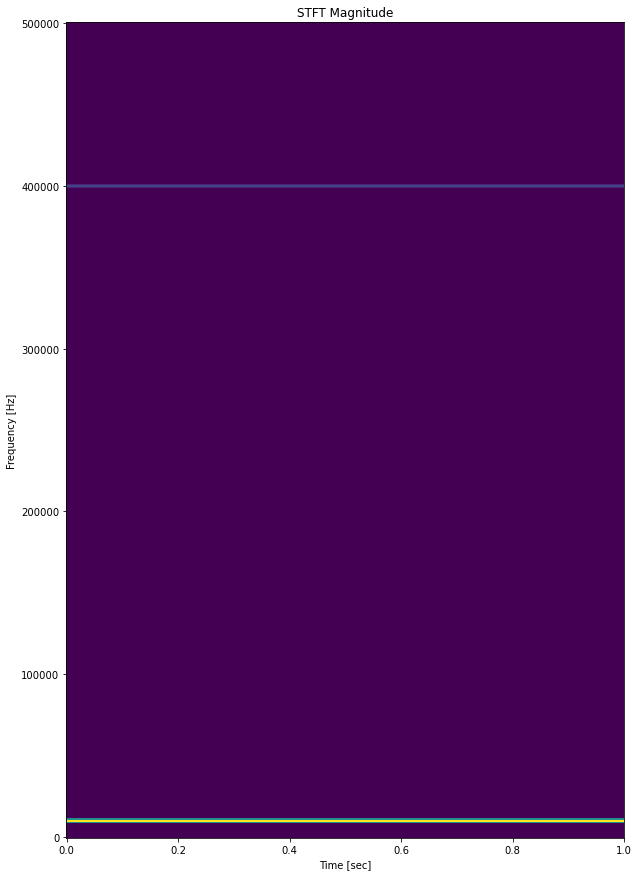

In [29]:
f, t, Zxx = signal.stft(wt_mix, fs=sample_rate, nperseg=1000)
plt.figure(figsize=(10,15))
plt.pcolormesh(t, f, np.abs(Zxx))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')


# Adaptive Filter

In [24]:
import padasip as pa

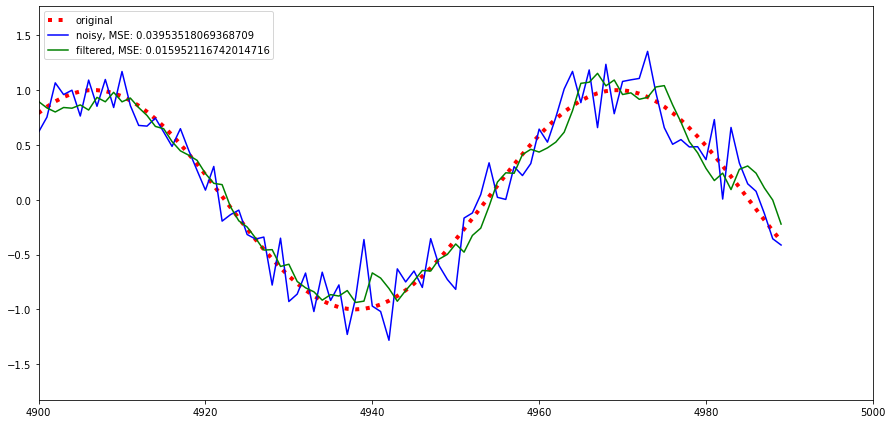

In [25]:
# signals creation: u, v, d
N = 5000
n = 10
u = np.sin(np.arange(0, N/10., N/50000.))
v = np.random.normal(0, 1, N)/5
d = u + v

# filtering
x = pa.input_from_history(d, n)[:-1]
d = d[n:]
u = u[n:]
f = pa.filters.FilterRLS(mu=1., n=n)
y, e, w = f.run(d, x)

# error estimation
MSE_d = np.dot(u-d, u-d) / float(len(u))
MSE_y = np.dot(u-y, u-y) / float(len(u))

# results
plt.figure(figsize=(12.5,6))
plt.plot(u, "r:", linewidth=4, label="original")
plt.plot(d, "b", label="noisy, MSE: {}".format(MSE_d))
plt.plot(y, "g", label="filtered, MSE: {}".format(MSE_y))
plt.xlim(N-100,N)
plt.legend()
plt.tight_layout()